# Homework #4

Name: Salvatore Zerbo

Course: Math 483

Date: 06/07/2019

# Problem 1

Minimum, x0=1: 1.0065309473976385
Minimum, x0=-1: -1.069940850720695


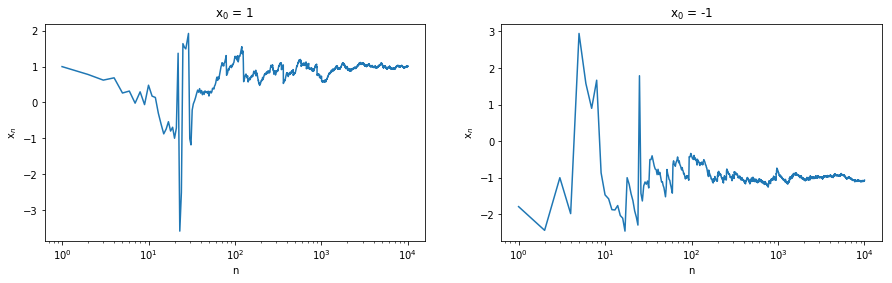

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(25)

def a(n):
    #Returns the value for the learning rate.
    
    return 1 / n

def F(x):
    #Returns the F_x(x) for the potential given in the problem.
    
    #d/dx [0.5(x^2 - 4)^2] = 2x(x^2 - 4)
    return 2 * x * (x**2 - 4)

#Setup
N = int(10**4)
start_points = [1, -1]

#Plot details
f, ax = plt.subplots(1, 2)
f.set_figwidth(15)

#Different start points
for i, x0 in enumerate(start_points):
    x = x0
    iterations = []
    trajectory = []

    #Run N iterations
    for n in range(1, N + 1):
        #Draw Y~N(0,1)
        Y = np.random.normal()

        #Update estimate
        x = x - a(n) * F(Y + x)

        #Boundary condition
        if abs(x) > 5:
            x = x0

        #Track trajectory
        iterations.append(n)
        trajectory.append(x)

    print("Minimum, x0={}:".format(start_points[i]), x)
    
    #Plot details
    ax[i].plot(iterations, trajectory)
    ax[i].set_xlabel("n")
    ax[i].set_ylabel("x$_{n}$")
    ax[i].title.set_text("x$_0$ = {}".format(start_points[i]))
    ax[i].semilogx()
plt.show()

Due to the different starting points, they converge to 2 different local minima.

# Problem 2

## Part a

For the nearest neighbors, all probabilities that aren't staying at the current state or moving to the next one over are zero. Then the probability for going from state 0 to states 2 or 3 = 0, from state 1 to state 3 = 0, etc. The probability of moving between the rest of the states is g = 1/2.

The acceptance probability of from moving from state x to state y is given by h = min(1, e$^{-(f(y)-f(x))/T}$).

## P(0->x)
$P(0->1) = g * h = \frac{1}{2} * min(1, e^{-(f(y)-f(x))/T}) = \frac{1}{2} * min(1, e^{-(f(1)-f(0))/T}) = \frac{1}{2} * min(1, e^{-2/T}) = \frac{1}{2} * e^{-2/T}$
$P(0->0) = 1 - P(0->1) = 1 - \frac{1}{2} * e^{-2/T}$
## P(1->x)
$P(1->0) = \frac{1}{2} * min(1, e^{-(f(0)-f(1))/T}) = \frac{1}{2} * min(1, e^{2/T}) = \frac{1}{2}$

$P(1->2) = \frac{1}{2} * min(1, e^{-(f(2)-f(1))/T}) = \frac{1}{2} * min(1, e^{1/(2T)}) = \frac{1}{2}$
## P(2->x)
$P(2->1) = \frac{1}{2} * min(1, e^{-(f(1)-f(2))/T}) = \frac{1}{2} * min(1, e^{-1/(2T)}) = \frac{1}{2} * e^{-1/(2T)}$

$P(2->3) = \frac{1}{2} * min(1, e^{-(f(3)-f(2))/T}) = \frac{1}{2} * min(1, e^{1/(2T)}) = \frac{1}{2}$

Since these don't sum to 1, then

$P(2->2) = 1 - P(2->1) - P(2->3) = 1 - \frac{1}{2} - \frac{1}{2} * e^{-1/(2T)} = \frac{1}{2}(1 - e^{-1/(2T)})$
## P(3->x)
$P(3->2) = \frac{1}{2} * min(1, e^{-(f(2)-f(3))/T}) = \frac{1}{2} * min(1, e^{-1/(2T)}) = \frac{1}{2} * e^{-1/(2T)}$

$P(3->3) = 1 - P(3->2) = 1 - \frac{1}{2} * e^{-1/(2T)}$

The final matrix is then:
\begin{bmatrix} 
1 - \frac{1}{2}e^{-2/T} & \frac{1}{2}e^{-2/T} & 0 & 0 \\
\frac{1}{2} & 0 & \frac{1}{2} & 0 \\
0 & \frac{1}{2}e^{-1/(2T)} & \frac{1}{2}(1-e^{-1/(2T)}) & \frac{1}{2} \\
0 & 0 & \frac{1}{2}e^{-1/(2T)} & 1-\frac{1}{2}e^{-1/(2T)}
\end{bmatrix}

## Part b and Part c

n = 1000
Average iterations ignoring not found: 114.36351165980795
Average iterations including not found: 354.371

n = 10000
Average iterations ignoring not found: 689.7881773399015
Average iterations including not found: 2440.108



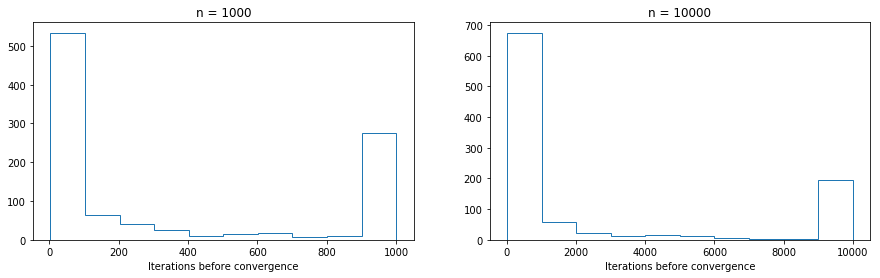

In [2]:
from math import log, exp
np.random.seed(25)

def T(t):
    '''
    Returns the temperature for current time t
    for simulated annealing.
    '''
    
    return 1 / log(t + 1)

def h(x, y, temp):
    #Returns the acceptance probability
    
    return min(1, exp((f(x) - f(y)) / temp))

def f(x):
    #Returns the Sandia Mountain function values
    
    if x == 0 or x == 1:
        return 2 * x - 1
    else:
        return (N - x) / (N - 1)

#Setup
n_list = [int(10**3), int(10**4)]
N = 2**2 - 1
x0 = 3
state_space = np.arange(0, N + 1)
choices = ["left", "right"]
probabilities = [0.5, 0.5]

#Plot details
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

#Two different max number of trials
for j, n in enumerate(n_list):
    iterations = []
    
    #Run 1000 trials
    for i in range(1000):
        #Setup
        found = False
        
        n_vals = [0]
        x_vals = [x0]
        x = x0

        #Run iterations
        for t in range(1, n + 1):
            #Draw based on neighborhood, careful at endpoints
            if x == 1 or x == 2:
                direction = np.random.choice(choices, replace = True, p = probabilities)
            elif x == 0:
                direction = np.random.choice(choices, replace = True, p = probabilities)
                
                if direction == "left":
                    direction = "stay"
            elif x == 3:
                direction = np.random.choice(choices, replace = True, p = probabilities)
                
                if direction == "right":
                    direction = "stay"
                    
            #Now move in direction
            if direction == "right":
                Y = x + 1
            elif direction == "left":
                Y = x - 1
            else:
                Y = x
            
            U = np.random.uniform()
                
            #Acceptance probability
            if U < h(x, Y, T(t)):
                x = Y
            
            #Add to arrays
            n_vals.append(t)
            x_vals.append(x)
            
            #Check if minimum is found
            if x == 0:
                found = True
                iterations.append(t)
                break
                
        #Max iterations if not found
        if not found:
            iterations.append(n)
    
    #Plot details
    print("n = {}".format(n))
    print("Average iterations ignoring not found:", np.mean([i for i in iterations if i < n]))
    print("Average iterations including not found:", np.mean(iterations))
    print()
    ax[j].set_title("n = {}".format(n))
    ax[j].hist(iterations, histtype = "step")
    ax[j].set_xlabel("Iterations before convergence")
plt.show()

# Problem 3

## Part a

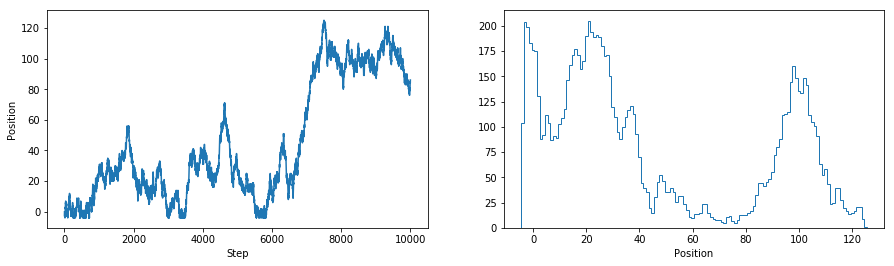

In [3]:
np.random.seed(25)

def random_walk(n_steps):
    #Performs a random walk with barriers.
    
    #Intialize arrays
    pos = [0]
    n = [0]

    #Flip coin and take steps - right = +1, left = -1
    for i in range(n_steps):
        #Reflecting barrier
        if pos[-1] == -4:
            pos.append(-3)
            n.append(n[-1] + 1)
        else:
            result = np.random.randint(0, 2)

            #Move based on results
            if result == 1:
                pos.append(pos[-1] + 1)
            elif result == 0:
                pos.append(pos[-1] - 1)
            n.append(n[-1] + 1)
        
    return n, pos

#Setup
n_steps = int(1E4)
n, pos = random_walk(n_steps)

#Plot details
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15)
ax1.set_xlabel("Step")
ax1.set_ylabel("Position")
ax1.plot(n, pos)
ax2.hist(pos, bins = np.arange(min(pos) - 0.5, max(pos) + 1.5, 1), histtype = "step")
ax2.set_xlabel("Position")
plt.show()

## Part b

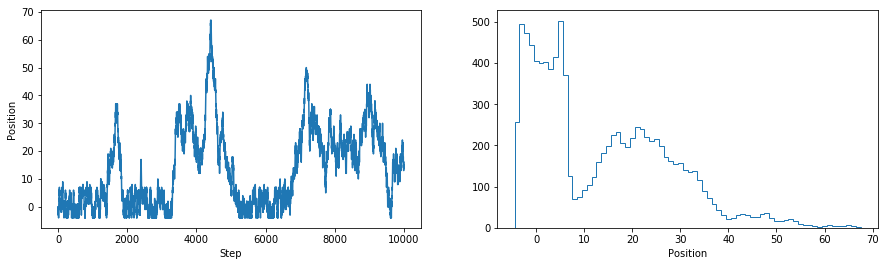

In [4]:
np.random.seed(25)

def random_walk(n_steps):
    #Performs a random walk with barriers.
    
    #Intialize arrays
    pos = [0]
    n = [0]

    #Flip coin and take steps - right = +1, left = -1
    for i in range(n_steps):
        #Reflecting barrier
        if pos[-1] == -4:
            pos.append(-3)
            n.append(n[-1] + 1)
        #Partial barrier
        elif pos[-1] == 6 or pos[-1] == 7:
            result = np.random.choice(possibilities, replace = True, p = P)
            
            #Move based on results
            if result == "back":
                pos.append(pos[-1] - 1)
            elif result == "forward":
                pos.append(pos[-1] + 1)
            n.append(n[-1] + 1)
        else:
            result = np.random.randint(0, 2)

            #Move based on results
            if result == 1:
                pos.append(pos[-1] + 1)
            elif result == 0:
                pos.append(pos[-1] - 1)
            n.append(n[-1] + 1)
        
    return n, pos

#Setup
n_steps = int(1E4)
possibilities = ["back", "forward"]
P = [0.75, 0.25]
n, pos = random_walk(n_steps)

#Plot details
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15)
ax1.set_xlabel("Step")
ax1.set_ylabel("Position")
ax1.plot(n, pos)
ax2.hist(pos, bins = np.arange(min(pos) - 0.5, max(pos) + 1.5, 1), histtype = "step")
ax2.set_xlabel("Position")
plt.show()

# Problem 4

## Part a

The system can be represented by a markov chain with nodes for each integer 0,1,...,a. The only transitions from states 0 and a are to themselves with probability 1. Each state i in {1,...,a-1} has transition probability p=0.51 to i+1 and probability p=0.49 to i-1.

$h_{x} = \mathbb{P}(reach\ a\ before\ 0\ |\ X(0) = x)$. Similarly to $r_{x}$, $h_{x} = qh_{x-1} + ph_{x+1}$ with $h_{0}=0$ and $h_{a}=1$.

Guessing $h_{x} = b^{x} \implies b^{x} = qb^{x-1} + pb^{x+1} \implies b = \frac{1 \pm (1-2p)}{2p} = \frac{q}{p}$.

For $p \neq q$, $h_{x} = A + B(\frac{q}{p})^{x}$

$h_{0} = 0 \implies A + B = 0 \implies A = -B$

$h_{a} = 1 \implies A + B(\frac{q}{p})^{a} = 1 \implies -B + B(\frac{q}{p})^{a} = 1 \implies B = \frac{1}{(q/p)^{a}-1}$

$\implies h_{x} = -\frac{1}{(q/p)^{a}-1} + \frac{(q/p)^{x}}{(q/p)^{a}-1} = \frac{(q/p)^{x}-1}{(q/p)^{a}-1}$

The values for $h_{x}$ are plotted and shown below given a = 100 and x = 1,...,99.

## Part b

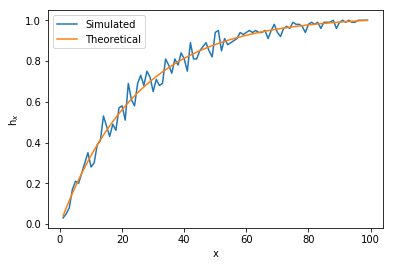

In [5]:
np.random.seed(25)

def random_walk(x):
    #Performs a random walk with barriers.
    
    #Intialize arrays
    pos = [x]
    n = [0]

    #Run until someone is broke
    while pos[-1] != a and pos[-1] != 0:
        result = np.random.choice(choices, replace = True, p = probabilities)

        #Move based on results
        if result == "right":
            pos.append(pos[-1] + 1)
        elif result == "left":
            pos.append(pos[-1] - 1)
        n.append(n[-1] + 1)
        
    return n, pos

#Setup
a = 100
p = 0.51
q = 1 - p
probabilities = [0.51, 0.49]
choices = ["right", "left"]
results = []
x_vals = []
theoretical = []

#Run for all x
for x in range(1, a):
    end = []
    
    #Run random walk 100 times and get average steps before ending
    for i in range(100):
        n, pos = random_walk(x)
        
        #Add 1 if reached a, otherwise 0
        if pos[-1] == a:
            end.append(1)
        else:
            end.append(0)
            
    #sum(end) = num times reached a, len(end) = num of random walks ran
    #sum(end) / len(end) = P(reached a before 0)
    results.append(sum(end) / len(end))
    x_vals.append(x)
    theoretical.append(((q / p)**x - 1) / ((q / p)**a - 1))

#Plot details
plt.plot(x_vals, results)
plt.plot(x_vals, theoretical)
plt.legend(["Simulated", "Theoretical"], loc = "best")
plt.xlabel("x")
plt.ylabel("h$_{x}$")
plt.show()